### Importing Libraries

In [200]:
import requests # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content
import re # regular expressions

import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import string
import spacy

### Web Scrapping

In [162]:
Amazon_Echo_Dot_reviews=[]

In [163]:
for i in range(1,20):
  ip=[]  

  url = "https://www.amazon.in/Echo-Dot-3rd-Gen/product-reviews/B07PFFMP9P/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
  # Extracting the content under specific tags  
# Extracting the content under specific tags    
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
Amazon_Echo_Dot_reviews=Amazon_Echo_Dot_reviews+ip   # 

### Loading the data

In [164]:
Amazon_Echo_Dot_reviews
reviews=pd.DataFrame(Amazon_Echo_Dot_reviews)

In [165]:
reviews.columns=['text']

In [166]:
reviews

,text
0,\nUseful as a speakerContinuous command is not...
1,\nAlexa is a great AI especially for mundane t...
2,\nI am writing this after a month of use..Had ...
3,\nvery good product\n
4,\nGood\n
5,\nWhy don't you add battery back up? And every...
6,\nSometimes automatically start song\n
7,\nGood\n
8,\nThe product is great but sometimes it doesn'...
9,\nEverything is good . Ot works all good as a ...


### EDA

In [167]:
affin=pd.read_csv('Afinn.csv', sep = ',',encoding='latin-1')
affin.shape

(2477, 2)

In [168]:
data1 = [text.strip() for text in reviews.text]#removing blank spaces
data1 = [text for text in data1 if text]#removing black lines
data1

['Useful as a speakerContinuous command is not possible as it has limited intelligence. Every sentence should start with Alexa..Good sound quality and loud enough',
 "Alexa is a great AI especially for mundane tasks like for facts and all so it's going to augment your learningThe bulb need a strong internet connection though .",
 'I am writing this after a month of use..Had lot of confusion before buying due to mixed reviews .. but finally bought after a direct friend recommendation and found it really good ..It may vary from one’s choice .. but certainly a good buy for daily music loversPros -Very good sound qualityAlexa response is quite fastCan play songs/playlist different each timeCan be connected to a high end speakers through Bluetooth and Alexa dot can be used as voice commands for song selectionCons -No direct play of already saved long from any phone devicesSound loudness can’t be kept too loud as it will make Alexa keyword response bleakFinal comment- if don’t have any other

In [169]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\gaurang
[nltk_data]     manjrekar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [170]:
#tokenizing
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data1))
sentences[0:15]

['Useful as a speakerContinuous command is not possible as it has limited intelligence.',
 "Every sentence should start with Alexa..Good sound quality and loud enough Alexa is a great AI especially for mundane tasks like for facts and all so it's going to augment your learningThe bulb need a strong internet connection though .",
 "I am writing this after a month of use..Had lot of confusion before buying due to mixed reviews .. but finally bought after a direct friend recommendation and found it really good ..It may vary from one’s choice .. but certainly a good buy for daily music loversPros -Very good sound qualityAlexa response is quite fastCan play songs/playlist different each timeCan be connected to a high end speakers through Bluetooth and Alexa dot can be used as voice commands for song selectionCons -No direct play of already saved long from any phone devicesSound loudness can’t be kept too loud as it will make Alexa keyword response bleakFinal comment- if don’t have any other

In [171]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df[0:20]

,sentence
0,Useful as a speakerContinuous command is not p...
1,Every sentence should start with Alexa..Good s...
2,I am writing this after a month of use..Had lo...
3,And every thing is fine Sometimes automaticall...
4,Ot works all good as a smart speaker but what ...
5,I used this for a month and sound is pretty go...


In [172]:
#frequency of words
freq1 = pd.Series(' '.join(sent_df['sentence']).split()).value_counts()[:50] # for top 20
freq1

a            11
good         10
is           10
it            8
as            8
for           7
to            7
and           6
but           6
sound         5
.             4
have          4
gen           3
loud          3
in            3
of            3
home          3
smart         3
music         3
this          3
Alexa         3
play          3
I             3
you           3
song          3
be            3
very          2
after         2
month         2
product       2
also          2
3rd           2
Good          2
don't         2
direct        2
the           2
recognise     2
used          2
from          2
can           2
google        2
buy           2
dot           2
Bluetooth     2
response      2
what          2
high          2
any           2
..            2
great         2
dtype: int64

In [173]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\gaurang
[nltk_data]     manjrekar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\gaurang
[nltk_data]     manjrekar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [174]:
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

### Removing stopwords

In [175]:
sent_df['sentence1'] = sent_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))

### Removing punctuations

In [176]:
sent_df['clean'] = sent_df['sentence1'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))

In [177]:
sent_df.head()

,sentence,sentence1,clean
0,Useful as a speakerContinuous command is not p...,Useful speakerContinuous command possible limi...,Useful speakerContinuous command possible limi...
1,Every sentence should start with Alexa..Good s...,Every sentence start Alexa..Good sound quality...,Every sentence start Alexa..Good sound quality...
2,I am writing this after a month of use..Had lo...,I writing month use..Had lot confusion buying ...,I writing month use..Had lot confusion buying ...
3,And every thing is fine Sometimes automaticall...,And every thing fine Sometimes automatically s...,And every thing fine Sometimes automatically s...
4,Ot works all good as a smart speaker but what ...,Ot works good smart speaker felt youtube music...,Ot works good smart speaker felt youtube music...


In [178]:
sent_df=sent_df.drop('sentence',axis=1)

In [179]:
sent_df=sent_df.drop('sentence1',axis=1)

In [180]:
sent_df.head()

,clean
0,Useful speakerContinuous command possible limi...
1,Every sentence start Alexa..Good sound quality...
2,I writing month use..Had lot confusion buying ...
3,And every thing fine Sometimes automatically s...
4,Ot works good smart speaker felt youtube music...


In [181]:
from itertools import islice
def take(n,iterable):
    "Return first n items of the iterable as list"
    return list(islice(iterable,n))

In [182]:
#coverting to dic format and for 20 words
affinity_scores = affin.set_index('word')['value'].to_dict()
take(20,affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [183]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        clean = nlp(text)
        for word in clean:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

### Calulating the sentiment value for each sentence

In [184]:

sent_df['sentiment_value'] = sent_df['clean'].apply(calculate_sentiment)

### Calulating the number of words in each sentence

In [185]:
sent_df['word_count'] = sent_df['clean'].str.split().apply(len)
sent_df['word_count'].head(10)

0     6
1    25
2    86
3    69
4    13
5     8
Name: word_count, dtype: int64

### Sort based on sentiment value

In [186]:

sent_df.sort_values(by='sentiment_value').head(10)

,clean,sentiment_value,word_count
0,Useful speakerContinuous command possible limi...,1,6
5,I used month sound pretty good loud also,4,8
1,Every sentence start Alexa..Good sound quality...,8,25
4,Ot works good smart speaker felt youtube music...,10,13
2,I writing month use..Had lot confusion buying ...,18,86
3,And every thing fine Sometimes automatically s...,19,69


### Sentiment value less than or equal to 0

In [187]:

sent_df[sent_df['sentiment_value']<=0]

,clean,sentiment_value,word_count


### Sentiment value greater than 0

In [198]:
sent_df[sent_df['sentiment_value']>=0]

,clean,sentiment_value,word_count,index,sentiment
0,Useful speakerContinuous command possible limi...,1,6,0,Positive
1,Every sentence start Alexa..Good sound quality...,8,25,1,Positive
2,I writing month use..Had lot confusion buying ...,18,86,2,Positive
3,And every thing fine Sometimes automatically s...,19,69,3,Positive
4,Ot works good smart speaker felt youtube music...,10,13,4,Positive
5,I used month sound pretty good loud also,4,8,5,Positive


In [189]:
sent_df['index']=range(0,len(sent_df))

In [190]:
sent_df.head()

,clean,sentiment_value,word_count,index
0,Useful speakerContinuous command possible limi...,1,6,0
1,Every sentence start Alexa..Good sound quality...,8,25,1
2,I writing month use..Had lot confusion buying ...,18,86,2
3,And every thing fine Sometimes automatically s...,19,69,3
4,Ot works good smart speaker felt youtube music...,10,13,4


In [191]:
def sentiment(sentiment_value):
    result = ''
    if sentiment_value < 0:
        result = 'Negative'
    if sentiment_value == 0:
        result = 'Neutral'
    if sentiment_value > 0 :
        result = 'Positive'
    return result
sent_df['sentiment'] = sent_df.sentiment_value.apply(sentiment)
sent_df.tail(20)

,clean,sentiment_value,word_count,index,sentiment
0,Useful speakerContinuous command possible limi...,1,6,0,Positive
1,Every sentence start Alexa..Good sound quality...,8,25,1,Positive
2,I writing month use..Had lot confusion buying ...,18,86,2,Positive
3,And every thing fine Sometimes automatically s...,19,69,3,Positive
4,Ot works good smart speaker felt youtube music...,10,13,4,Positive
5,I used month sound pretty good loud also,4,8,5,Positive


### Density plot

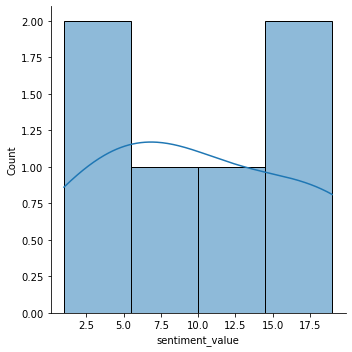

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(sent_df['sentiment_value'], kde =True)

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

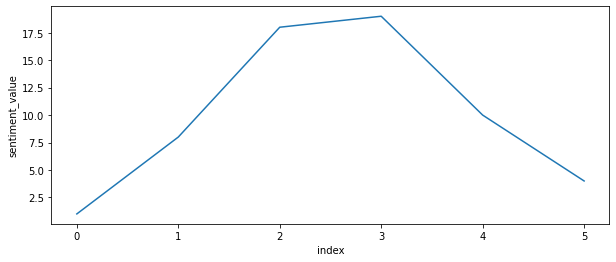

In [193]:
#lineplot based on sentiment value
plt.figure(figsize=(10, 4))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

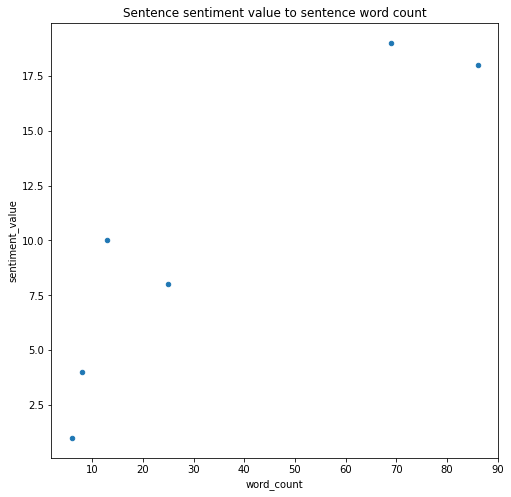

In [194]:
#scatterplot between wordcount and sentiment value
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8),
                     title='Sentence sentiment value to sentence word count')

### Here all of the reviews are Positive 
### So from overall reviews we can conclude that its a good product